**Data import**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import calendar
from datetime import datetime

%matplotlib inline

In [2]:
# Importing and merging the files
joined_files = os.path.join("/content/drive/MyDrive/Dane z aplikacji/Garmin Connect/Kroki/Data_2022", "*.csv")

In [3]:
# A list of all joined files
joined_list = glob.glob(joined_files)

# First version of the dataframe
steps = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

#Variables
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

**Data check**

In [4]:
# Checking the dimensions of the dataframe
steps.shape

(567, 3)

In [5]:
# Samples from dataframe
steps.sample(10)

,Unnamed: 0,Bieżąca,Cel
522,18 lis,9954,10000
19,16 sty,12114,10000
456,13 wrz,5425,10000
100,7 kwi,3809,10000
225,25 sty,12176,10000
298,8 kwi,3721,10000
9,6 sty,5576,10000
113,20 kwi,8610,10000
187,3 lip,9370,10000
261,2 mar,13115,10000


In [6]:
# Checking the types of data
steps.dtypes

Unnamed: 0    object
Bieżąca        int64
Cel            int64
dtype: object

**Data cleaning**

In [7]:
# Deleting the last column in the dataframe
steps2 = steps.iloc[: , :-1]
steps2.columns

Index(['Unnamed: 0', 'Bieżąca'], dtype='object')

In [8]:
# Renaming the column names
steps2.rename(columns = {'Unnamed: 0':'Date','Bieżąca':'Steps'}, inplace = True)
steps2.head()

,Date,Steps
0,28 gru,5617
1,29 gru,12020
2,30 gru,3887
3,31 gru,2762
4,1 sty,4006


In [9]:
# Converting the Date column into string
# Splitting the Date column into Day, Month and Year
# Filling 0 where needed in the Day column

steps2['Date'] = steps2['Date'].astype('str')
steps2['Date'] = steps2['Date'].str.strip()
new = steps2["Date"].str.split(" ", n = 1, expand = True)
steps2["Day"]= new[0]
steps2["Month"]= new[1]
steps2["Year"]= '2022'

n = 2
steps2['Day'] = steps2['Day'].str.zfill(n)
steps2.head()

,Date,Steps,Day,Month,Year
0,28 gru,5617,28,gru,2022
1,29 gru,12020,29,gru,2022
2,30 gru,3887,30,gru,2022
3,31 gru,2762,31,gru,2022
4,1 sty,4006,01,sty,2022


In [10]:
# Replacing polish shortcuts of months names into appropriate numbers
steps2['Month'] = steps2['Month'].replace(['sty', 'lut', 'mar', 'kwi', 'maj', 'cze', 'lip', 'sie', 'wrz', 'paź', 'lis','gru'],['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
steps2.head()

,Date,Steps,Day,Month,Year
0,28 gru,5617,28,12,2022
1,29 gru,12020,29,12,2022
2,30 gru,3887,30,12,2022
3,31 gru,2762,31,12,2022
4,1 sty,4006,01,01,2022


In [11]:
# Concatenating three columns (Day, Month, Year) into one (New_date)
steps2['New_date'] = steps2['Year'] + '-' + steps2['Month'] + '-' + steps2['Day']
#pd.to_datetime(steps2['New_date'])
steps2.head()

,Date,Steps,Day,Month,Year,New_date
0,28 gru,5617,28,12,2022,2022-12-28
1,29 gru,12020,29,12,2022,2022-12-29
2,30 gru,3887,30,12,2022,2022-12-30
3,31 gru,2762,31,12,2022,2022-12-31
4,1 sty,4006,01,01,2022,2022-01-01


In [12]:
# Checking for duplicated dates
steps3 = steps2[steps2.duplicated(['New_date'], keep=False)]

In [13]:
# Sorting dataframe by New_date column values
steps2 = steps2.sort_values(by="New_date")
steps2.tail(20)

,Date,Steps,Day,Month,Year,New_date
555,21 gru,3548,21,12,2022,2022-12-21
556,22 gru,12006,22,12,2022,2022-12-22
557,23 gru,8841,23,12,2022,2022-12-23
558,24 gru,22218,24,12,2022,2022-12-24
559,25 gru,14484,25,12,2022,2022-12-25
560,26 gru,4979,26,12,2022,2022-12-26
561,27 gru,19797,27,12,2022,2022-12-27
196,27 gru,15470,27,12,2022,2022-12-27
562,28 gru,4431,28,12,2022,2022-12-28
0,28 gru,5617,28,12,2022,2022-12-28


In [14]:
if len(steps2) > 365:
  print(f'{len(steps2) - 365} values should be deleted in next step')

202 values should be deleted in next step


In [15]:
# Deleting inappropriate data which were selected manually from steps3 dataframe
steps4 = steps2.drop([0,1,2,3,4,370])

In [16]:
steps4.head(14)

,Date,Steps,Day,Month,Year,New_date
566,1 sty,16846,01,01,2022,2022-01-01
201,1 sty,4006,01,01,2022,2022-01-01
5,2 sty,10672,02,01,2022,2022-01-02
202,2 sty,10672,02,01,2022,2022-01-02
203,3 sty,3986,03,01,2022,2022-01-03
6,3 sty,3986,03,01,2022,2022-01-03
7,4 sty,5205,04,01,2022,2022-01-04
204,4 sty,5205,04,01,2022,2022-01-04
8,5 sty,5380,05,01,2022,2022-01-05
205,5 sty,5380,05,01,2022,2022-01-05


In [17]:
steps4.tail(14)

,Date,Steps,Day,Month,Year,New_date
557,23 gru,8841,23,12,2022,2022-12-23
558,24 gru,22218,24,12,2022,2022-12-24
559,25 gru,14484,25,12,2022,2022-12-25
560,26 gru,4979,26,12,2022,2022-12-26
561,27 gru,19797,27,12,2022,2022-12-27
196,27 gru,15470,27,12,2022,2022-12-27
562,28 gru,4431,28,12,2022,2022-12-28
197,28 gru,5617,28,12,2022,2022-12-28
198,29 gru,12020,29,12,2022,2022-12-29
563,29 gru,3885,29,12,2022,2022-12-29


In [18]:
# Changing type of New_data column
steps4['New_date'] = [datetime.strptime(x,"%Y-%m-%d") for x in steps4['New_date']]

In [19]:
# Creating new columns: Weekday and Month
# Reseting the index
steps4['Weekday'] = steps4['New_date'].dt.day_name()
steps4['Month'] = steps4['New_date'].dt.month_name()
steps4.reset_index(inplace=True)
steps4.head(372)

,index,Date,Steps,Day,Month,Year,New_date,Weekday
0,566,1 sty,16846,01,January,2022,2022-01-01,Saturday
1,201,1 sty,4006,01,January,2022,2022-01-01,Saturday
2,5,2 sty,10672,02,January,2022,2022-01-02,Sunday
3,202,2 sty,10672,02,January,2022,2022-01-02,Sunday
4,203,3 sty,3986,03,January,2022,2022-01-03,Monday
...,...,...,...,...,...,...,...,...
367,188,4 lip,2891,04,July,2022,2022-07-04,Monday
368,385,4 lip,2891,04,July,2022,2022-07-04,Monday
369,386,5 lip,4663,05,July,2022,2022-07-05,Tuesday
370,189,5 lip,4663,05,July,2022,2022-07-05,Tuesday


In [20]:
# Assigning seasons to dates
winter_1 = (steps4['New_date'] >= '2022-01-01') & (steps4['New_date'] <= '2022-03-20')
winter_2 = (steps4['New_date'] >= '2022-12-21')
spring = (steps4['New_date'] >= '2022-03-21') & (steps4['New_date'] <= '2022-06-21')
summer = (steps4['New_date'] >= '2022-06-22') & (steps4['New_date'] <= '2022-09-22')
autumn = (steps4['New_date'] >= '2022-09-23') & (steps4['New_date'] <= '2022-12-21')

steps4.loc[winter_1,'Season'] ='Winter'
steps4.loc[winter_2,'Season'] ='Winter'
steps4.loc[spring,'Season'] ='Spring'
steps4.loc[summer,'Season'] ='Summer'
steps4.loc[autumn,'Season'] ='Autumn'

steps4.head(365)

,index,Date,Steps,Day,Month,Year,New_date,Weekday,Season
0,566,1 sty,16846,01,January,2022,2022-01-01,Saturday,Winter
1,201,1 sty,4006,01,January,2022,2022-01-01,Saturday,Winter
2,5,2 sty,10672,02,January,2022,2022-01-02,Sunday,Winter
3,202,2 sty,10672,02,January,2022,2022-01-02,Sunday,Winter
4,203,3 sty,3986,03,January,2022,2022-01-03,Monday,Winter
...,...,...,...,...,...,...,...,...,...
360,184,30 cze,16467,30,June,2022,2022-06-30,Thursday,Summer
361,382,1 lip,9342,01,July,2022,2022-07-01,Friday,Summer
362,185,1 lip,9342,01,July,2022,2022-07-01,Friday,Summer
363,186,2 lip,8676,02,July,2022,2022-07-02,Saturday,Summer


In [21]:
# Reordering the columns
df = steps4[['New_date', 'Month', 'Weekday','Season','Steps']]
df.head()

,New_date,Month,Weekday,Season,Steps
0,2022-01-01,January,Saturday,Winter,16846
1,2022-01-01,January,Saturday,Winter,4006
2,2022-01-02,January,Sunday,Winter,10672
3,2022-01-02,January,Sunday,Winter,10672
4,2022-01-03,January,Monday,Winter,3986


In [22]:
# Checking if the length of dataframe is appropriate 
n = 365 
if n-len(df) == 0:
  print ("Valid number of days")
else:
  print ("Invalid number of days")

Invalid number of days


In [24]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/Outputs/Steps_2022.csv')

**DATA ANALYSIS**

In [25]:
# Annual statistics (sum, mean, max, min) and the calculation of goal achievement
x = df["Steps"]

x1 = str(x.sum())
x2 = str(round(x.mean()))
x3 = str(x.max())
x4 = str(x.min())

goal = df['Steps']> 10000
goal = df[goal]
res = len(goal.index)
x5 = "{:.0%}".format(res/365)

print(
"In 2021 I did:\n\n" + x1 + 
" - total steps,\n" + x2 + 
" - average,\n" + x3 + 
" - max in a day,\n" + x4 + 
" - min in a day.\n\nMoreover I had " + 
str(res) + ' days when the goal of 10 000 steps per day was achieved and it constitutes ' + 
x5 +'.')

In 2021 I did:

4493785 - total steps,
8010 - average,
22842 - max in a day,
1160 - min in a day.

Moreover I had 154 days when the goal of 10 000 steps per day was achieved and it constitutes 42%.


In [26]:
# Monthly statistics (sum, mean, max, min)
new_order_m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthAggregated = df.groupby('Month').agg({'Steps': 'sum'}).astype(int).reset_index()
monthAggregated.rename(columns = {'Steps':'Sum'}, inplace = True)

mean = df.groupby('Month').agg({'Steps': 'mean'}).reset_index()
monthAggregated['Mean'] = mean['Steps'].astype(int)

max = df.groupby('Month').agg({'Steps': 'max'}).reset_index()
monthAggregated['Max'] = max['Steps']

min = df.groupby('Month').agg({'Steps': 'min'}).reset_index()
monthAggregated['Min'] = min['Steps']

monthAggregated

,Month,Sum,Mean,Max,Min
0,April,408358,6805,18594,1160
1,August,211462,6821,11669,2743
2,December,312165,8671,22218,2762
3,February,354596,6332,15820,1282
4,January,441474,7120,16846,1713
5,July,350188,8337,15781,2891
6,June,430290,7293,17137,1618
7,March,688508,11104,21834,3767
8,May,503718,8124,14255,2721
9,November,247844,8261,17450,2487


In [27]:
# Average steps per season
new_order_s = ['Spring','Summer','Autumn', 'Winter']
seasonAggregated = df.groupby('Season').agg({'Steps': 'mean'}).reset_index()
seasonAggregated['Steps'] = seasonAggregated['Steps'].astype(int)
seasonAggregated

,Season,Steps
0,Autumn,8427
1,Spring,7493
2,Summer,8147
3,Winter,8255


In [28]:
# Average steps per day of the week
new_order_w = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

weekdayAggregated = df.groupby('Weekday').agg({'Steps': 'mean'}).reset_index()
weekdayAggregated['Steps'] = weekdayAggregated['Steps'].astype(int)
weekdayAggregated

,Weekday,Steps
0,Friday,7662
1,Monday,7914
2,Saturday,9919
3,Sunday,9144
4,Thursday,6811
5,Tuesday,7762
6,Wednesday,6823


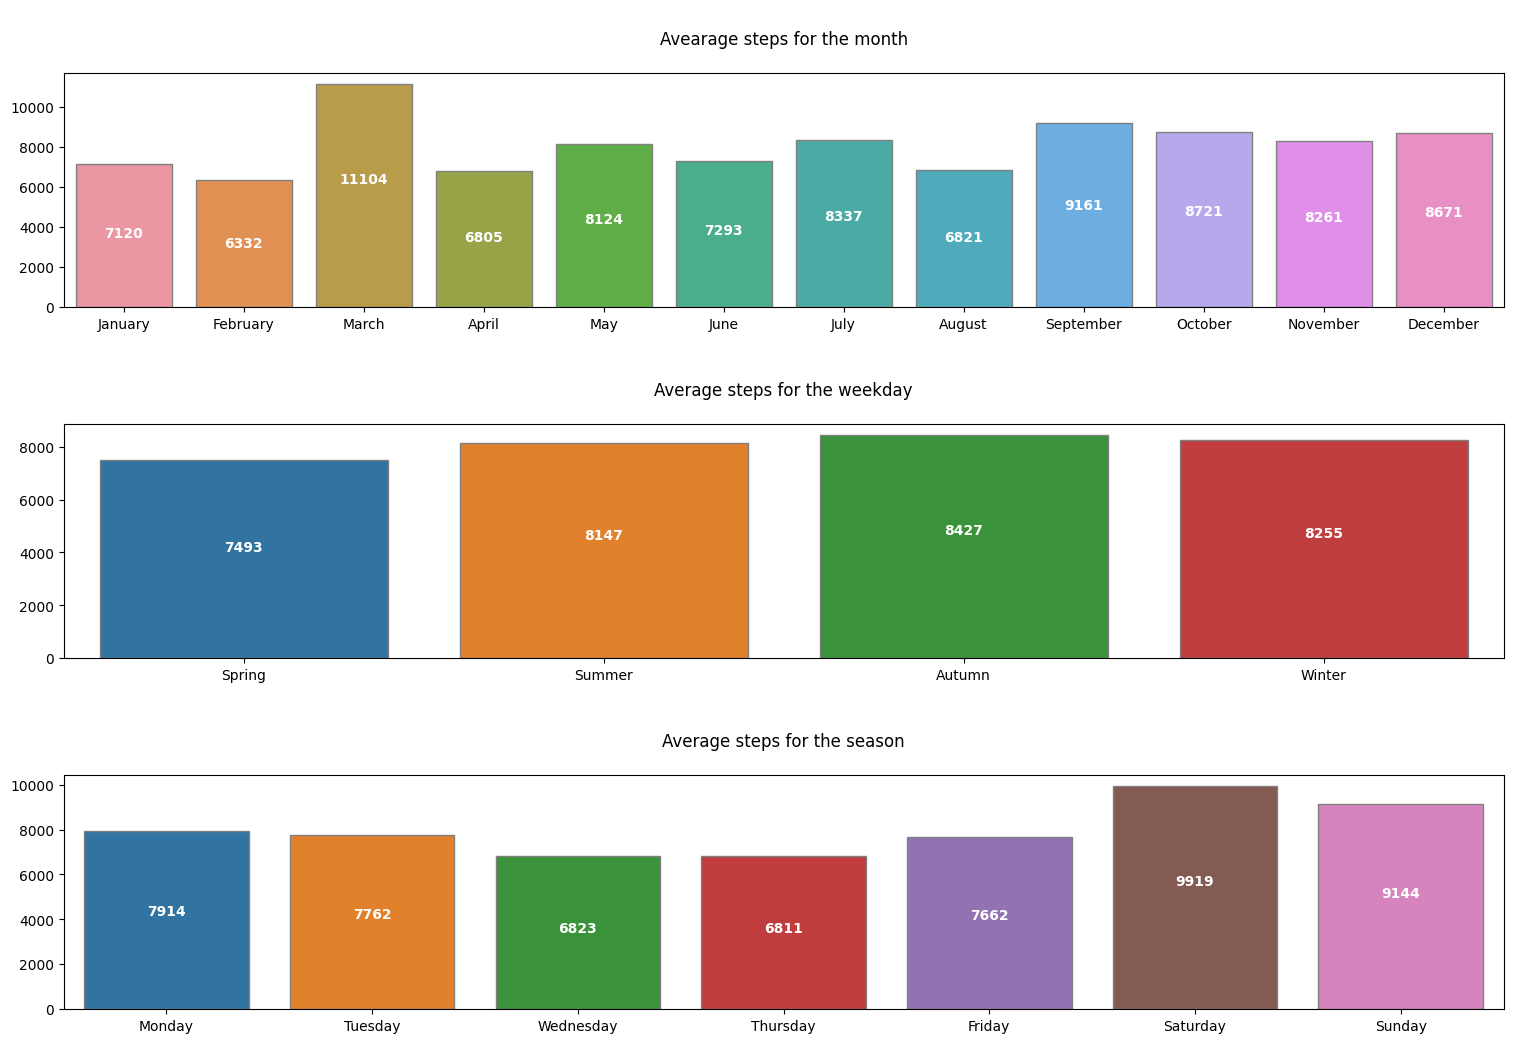

In [29]:
# The Seaborn barplots with average steps per month, day of the week and season
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,12)


sns.set_style('darkgrid')
sns.barplot(data = monthAggregated, x= 'Month', y = 'Mean', ax= ax1, order=new_order_m, edgecolor = 'grey')
sns.barplot(data = seasonAggregated, x= 'Season', y = 'Steps', ax= ax2, order=new_order_s, edgecolor = 'grey')
sns.barplot(data = weekdayAggregated, x= 'Weekday', y = 'Steps', ax= ax3, order=new_order_w, edgecolor = 'grey')
sns.set_context(rc = {'patch.linewidth': 0.0})


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.4, hspace=0.5)


ax1.title.set_text('\n'+'Avearage steps for the month' + '\n')
ax2.title.set_text('\n'+'Average steps for the weekday' + '\n')
ax3.title.set_text('\n'+'Average steps for the season' + '\n')



ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')

In [ ]:
# Additional modules installing
try:
  import calmap
  import july
except:
  ! pip install calmap
  ! pip install july
  import calmap
  import july

/usr/local/lib/python3.9/dist-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/usr/local/lib/python3.9/dist-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]


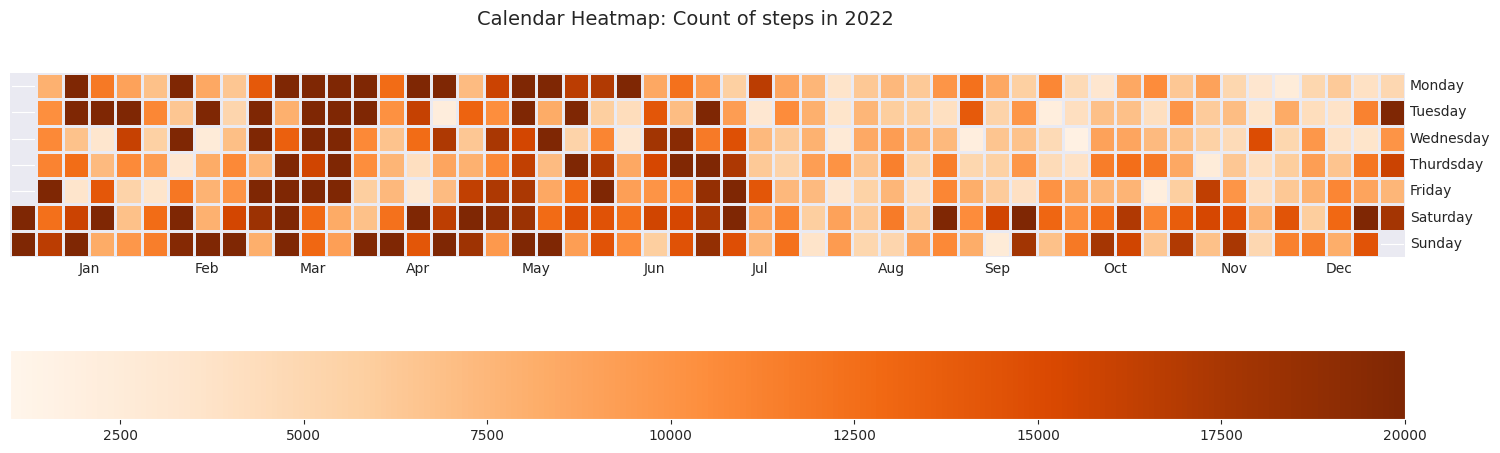

In [34]:
# The calendar heatmap using Calmap module
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)

df.index = pd.to_datetime(df['New_date'])

events = df["Steps"]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thurdsday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cax = calmap.yearplot(events, 
                      year=2022, 
                      ax=ax, 
                      cmap='Oranges',
                      vmin = '1000',
                      vmax = '20000',
                      daylabels = days
                      )
fig.suptitle('Calendar Heatmap: Count of steps in 2022',fontsize=14, y=0.65)
fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')

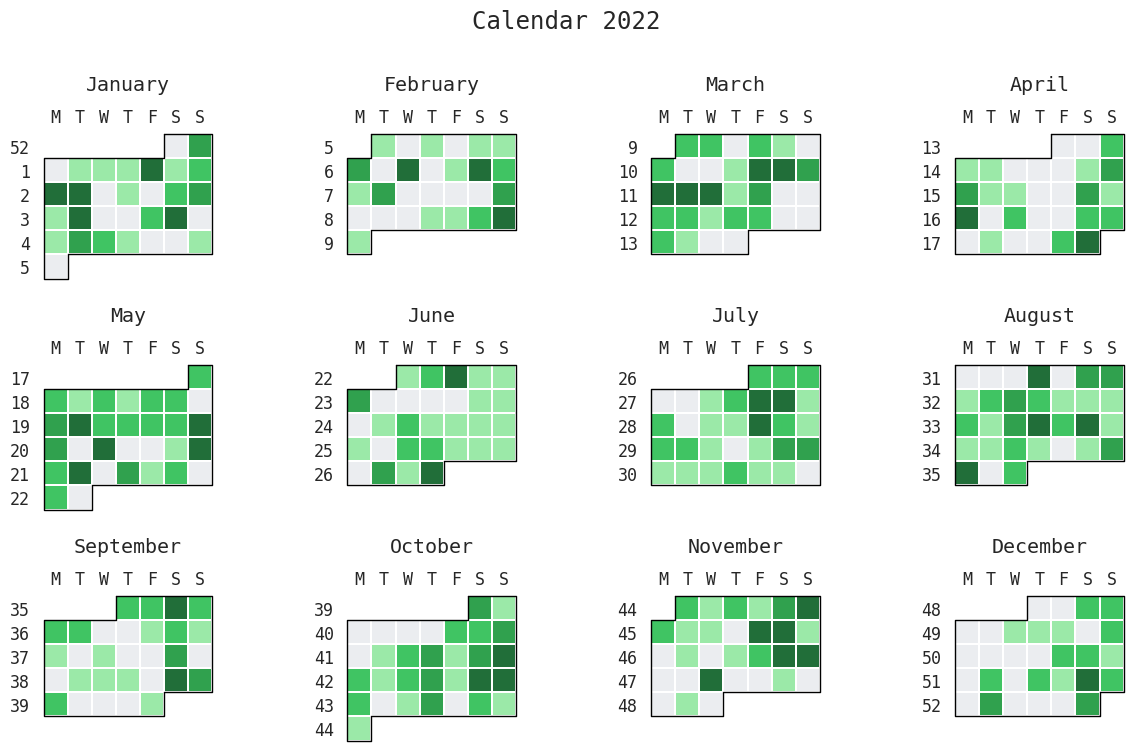

In [35]:
# The calendar heatmap using July module (I)
cax_2 = july.calendar_plot(df['New_date'], df['Steps'], cmap = 'github')

<Axes: title={'center': 'June'}>

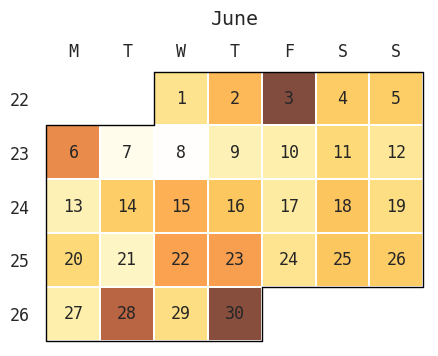

In [36]:
# The calendar heatmap using July module (II)
# Insight into the month with highest average of steps per month
july.month_plot(df['New_date'], df['Steps'], cmap = 'golden', month = 6, date_label=True)